## Base de dados, Histórico do clima em Szeged 2006-2016 {https://www.kaggle.com/budincsevity/szeged-weather}


In [37]:
import pandas as pd
dataset = pd.read_csv("./weatherHistory.csv")

In [38]:
#Reduzir o tamanho do dataset para 500
dataset = dataset.drop(axis=0, labels=list(dataset.index.array)[500:])

In [39]:
datasetDict = dataset.to_dict() #Converter para dicionario

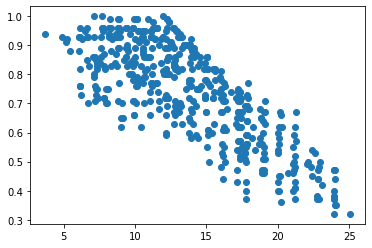

In [40]:
import matplotlib.pylab as plt
#Ploando o grafico entre temperatura e umidade
import numpy as np
x = np.array(list(datasetDict['Temperature (C)'].values()))
y = np.array(list(datasetDict['Humidity'].values()))
plt.scatter(x=x, y=y)

In [41]:
x = dataset['Temperature (C)']
y = dataset['Humidity']

In [42]:
#Arrumando os dados para a classe so sklearn
x = x.values
x = x.reshape(x.shape[0], 1)
y = y.values
y = y.reshape(y.shape[0], 1)

0.010934286804166025
[1.13383651] [[-0.02857368]]


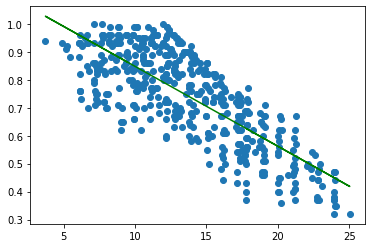

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

modelo = LinearRegression()
modelo.fit(x, y)
ypred = modelo.predict(x)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

plt.scatter(x, y)
plt.plot(x, ypred, 'g')
plt.show()

In [44]:
def z_function(W0, W1):
    #Função pra encontrar o eixo z do grafico
    modelo = LinearRegression()
    Erro = np.empty(W0.shape)
    control = False
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            if not control:
                modelo.fit(W0[j][k].reshape(-1, 1), W1[j][k].reshape(-1, 1))
                control = True #varivel para executar o fit somente uma vez
            #Alternando entre todos os valores
            modelo.intercept_ = W0[j][k].reshape(-1, 1) 
            modelo.coef_ = W1[j][k].reshape(-1, 1)
            ypred = modelo.predict(x)
            mse = mean_squared_error(y, ypred)
            #Armazenar o MSE de cada exemplo da base usava como treino
            Erro[j][k] = mse
    return Erro


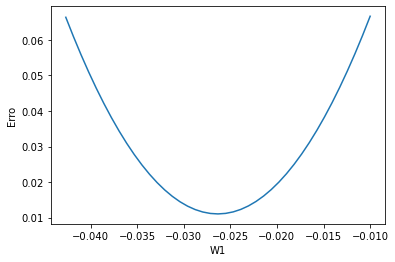

In [45]:
w0 = np.linspace(1.10, 1.15, 1) #coef_
w1 = np.linspace(-0.05, -0.01, 50) #intercept

W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

plt.ylabel('Erro')
plt.xlabel('W1')
i = 9 # A partir do 9 a parábola fica perfeita (coloque em 0 para ver o gráfico completo)
plt.plot(W1[i:], Erro[i:])
plt.show()
#Gráfico 2D de todos os erros em função do intercept
